<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='white' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [181]:
import warnings
warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [182]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

## Visualizar os dados

In [183]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando o tamanho do dataset

In [184]:
dados.shape

(365, 7)

In [185]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


## Estatísticas descritivas

In [186]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [187]:
dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


# <font color='white' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

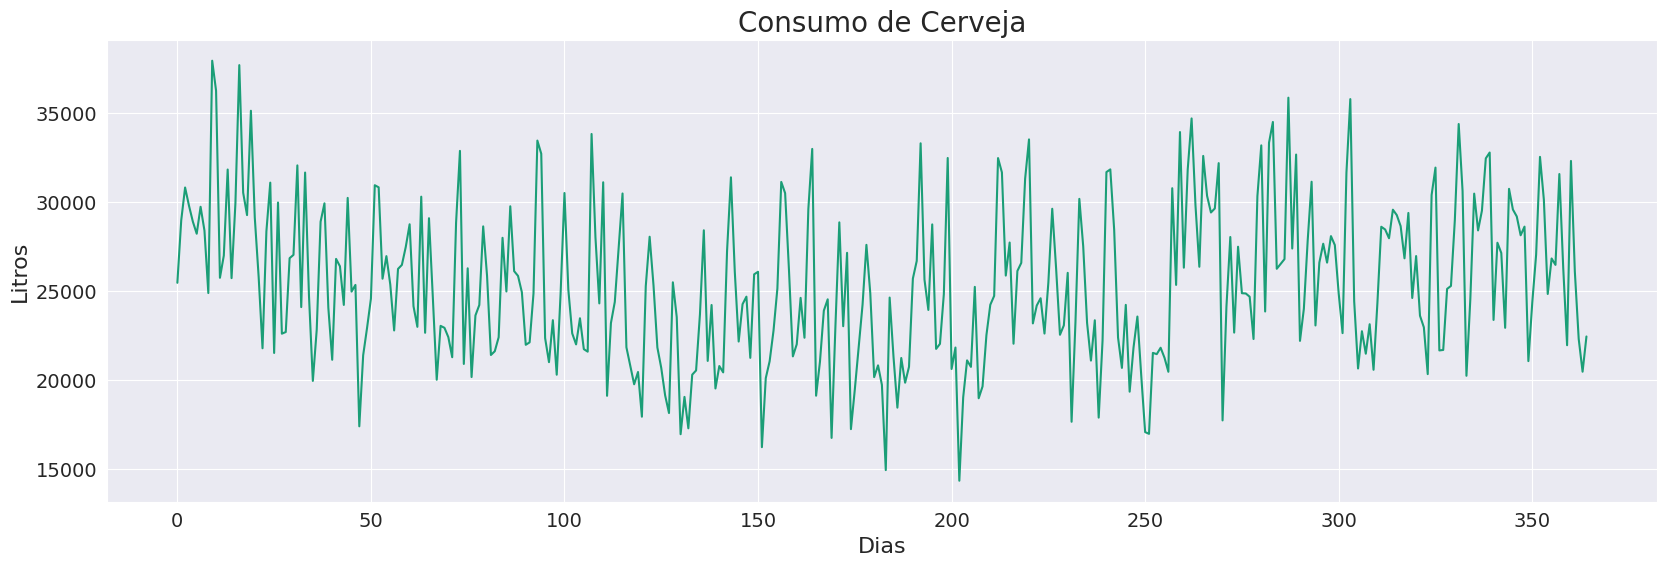

In [188]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

## Melhorando a visualização dos dados
### Alterações:
* Alteração na varável "data" que ra do tipo object para o tipo datetime
* Alteração no eixo X para mostrar as datas no formato (ano/mês).
* Ateração na cor das linhas do Gráfico.
* Acrescentando Legenda.

In [189]:
from datetime import datetime
dados['data'] = pd.to_datetime(dados['data'])

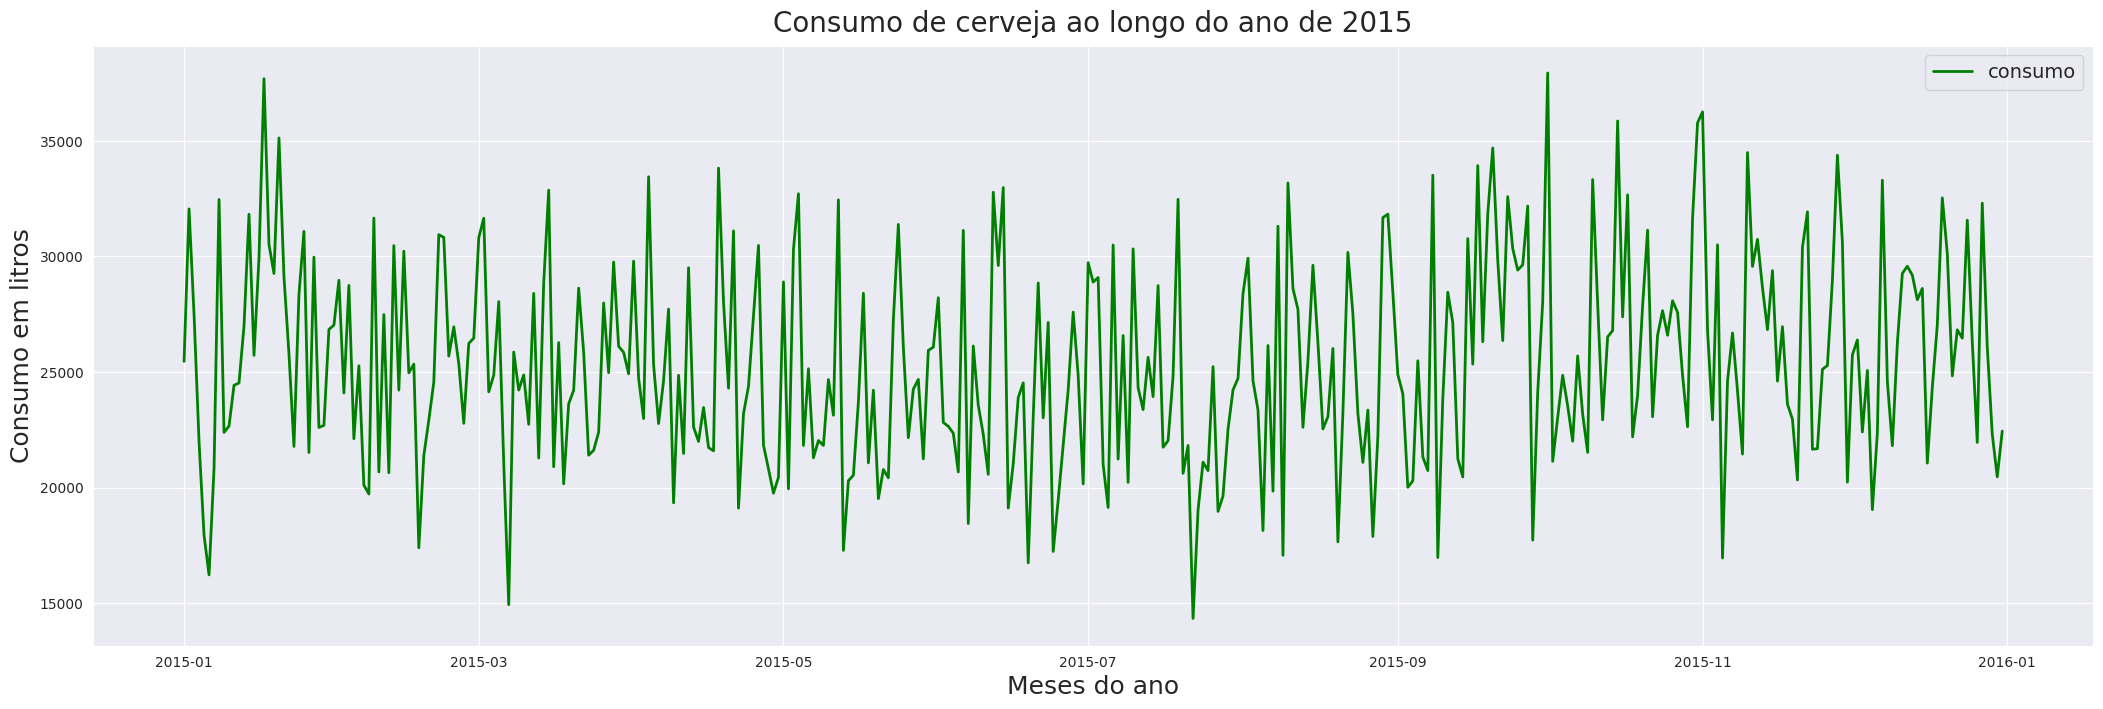

In [190]:
dados['dia'] = dados['data'].dt.date
consumo_por_dia = dados.groupby('dia')['consumo'].mean().reset_index()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='g', lw=2)

ax.set_title('Consumo de cerveja ao longo do ano de 2015', fontsize=20, pad=10)
ax.set_xlabel('Meses do ano', fontsize=18)
ax.set_ylabel('Consumo em litros', fontsize=18)
ax.legend(['consumo'], loc='upper right', fontsize=14)
ax.grid(True)

## Adicionando linhas de restrição e anotações
### Visualizando o ponto mínimo e máximo no consumo de cerveja

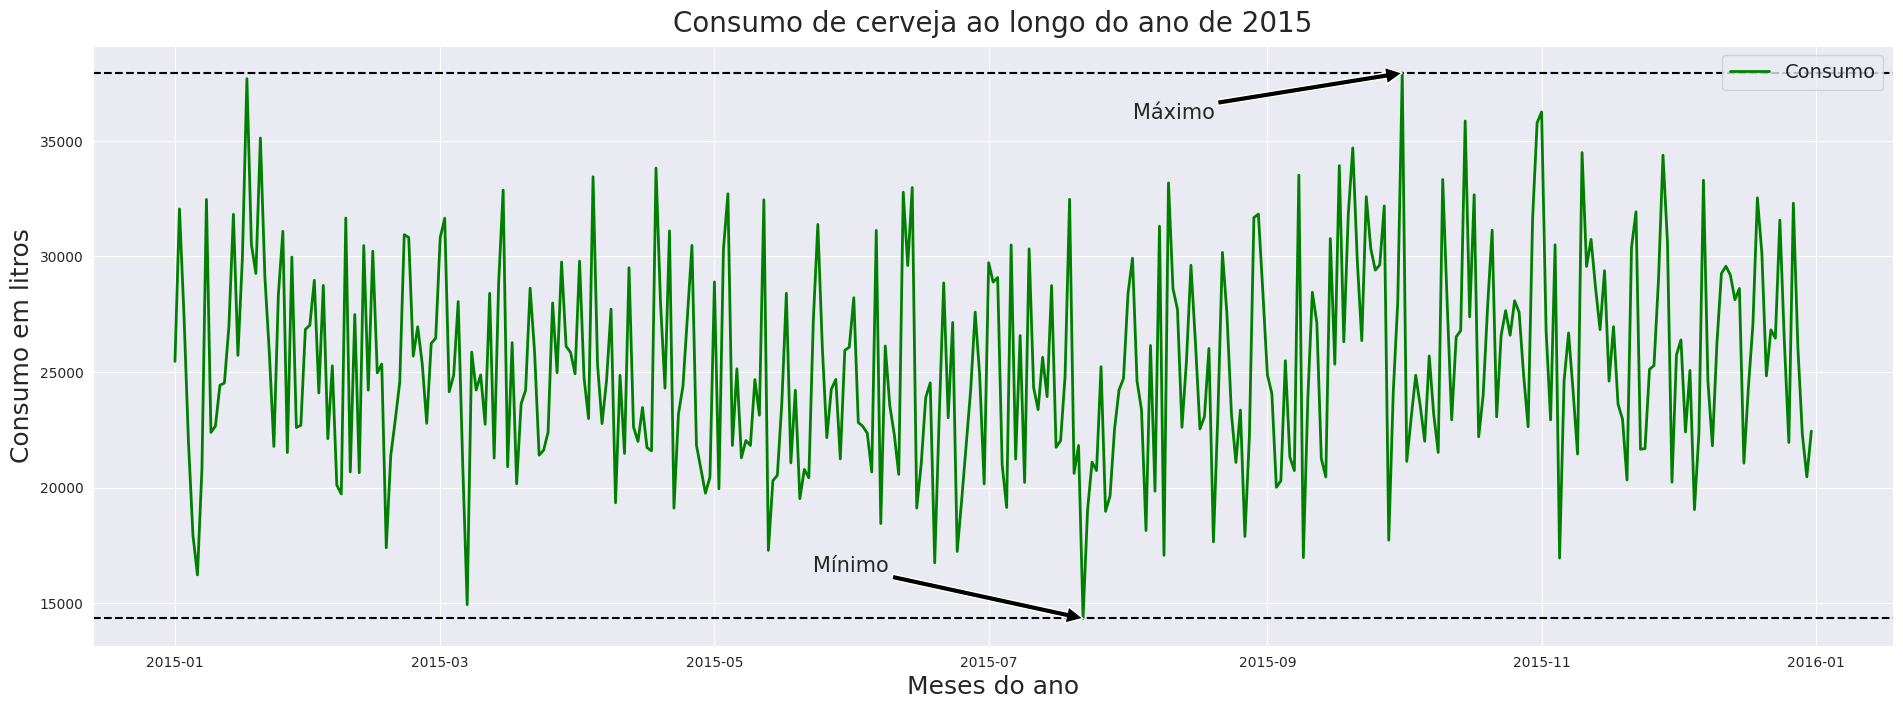

In [191]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='g', lw=2)
ax.set_title('Consumo de cerveja ao longo do ano de 2015', fontsize=20, pad=10)
ax.set_xlabel('Meses do ano', fontsize=18)
ax.set_ylabel('Consumo em litros', fontsize=18)
ax.grid(True)
ax.legend(['Consumo'], loc='upper right', fontsize=14)

x1 = consumo_por_dia['dia'][consumo_por_dia['consumo'].idxmax()]
y1 = max(consumo_por_dia['consumo'])

x2 = consumo_por_dia['dia'][consumo_por_dia['consumo'].idxmax() - 60]
y2 = max(consumo_por_dia['consumo']) - 2000

ax.annotate("Máximo", xy=(x1, y1), fontsize=15, xytext=(x2, y2), arrowprops=dict(facecolor='k'))


x1 = consumo_por_dia['dia'][consumo_por_dia['consumo'].idxmin()]
y1 = min(consumo_por_dia['consumo'])

x2 = consumo_por_dia['dia'][consumo_por_dia['consumo'].idxmin() - 60]
y2 = min(consumo_por_dia['consumo'] + 2000)

ax.annotate("Mínimo", xy=(x1, y1), fontsize=15, xytext=(x2, y2), arrowprops=dict(facecolor='k'))

ax.axhline(max(consumo_por_dia['consumo']), color='k', linestyle='--')
ax.axhline(min(consumo_por_dia['consumo']), color='k', linestyle='--')

## Analizando mais detalhadamente os meses de Julho e Setembro
* O mês de Julho teve o ponto mais baixo no consumo de cerveja, já o mês de Setembro teve o ponto mais alto, então vamos visualiza-los mais detalhadamente.

### Mês de Julho

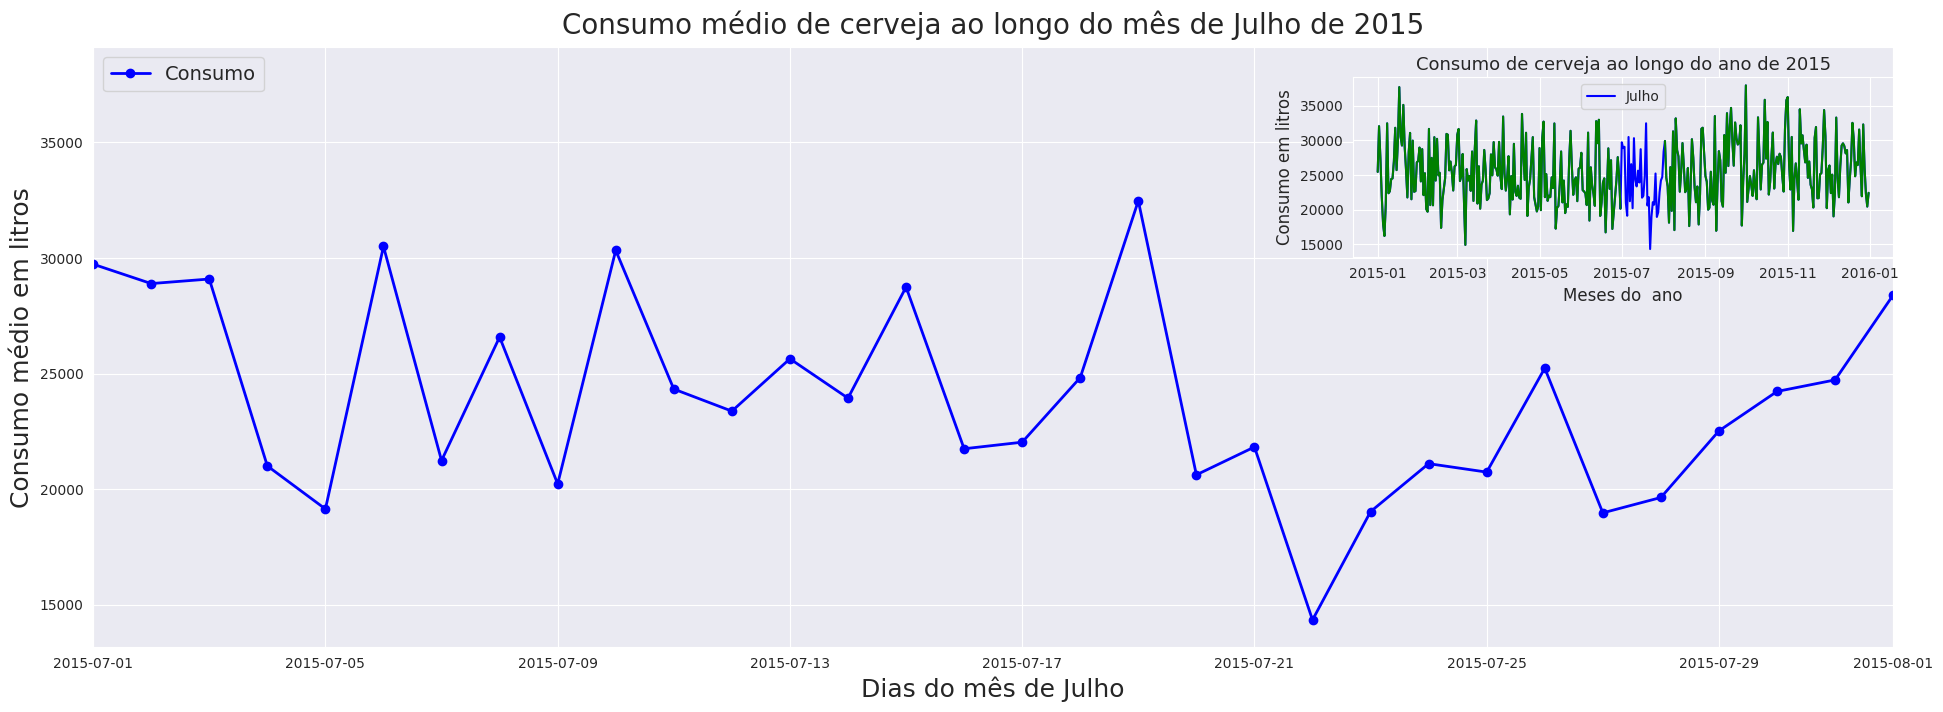

In [192]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([0.7, 0.65, 0.3, 0.3])
ax_2.grid(True)


ax.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='b', lw=2, marker='o')
ax.set_xlim(datetime(2015, 7, 1), datetime(2015, 8, 1))

ax.set_title('Consumo médio de cerveja ao longo do mês de Julho de 2015', fontsize=20, pad=10)
ax.set_xlabel('Dias do mês de Julho', fontsize=18)
ax.set_ylabel('Consumo médio em litros', fontsize=18)
ax.legend(['Consumo'], loc='upper left', fontsize=14)
ax.grid(True)

# filtro azul a esquerda para a variável data que seja anterior a data de Março de 2015
azul_esquerda = consumo_por_dia['dia'] < datetime(2015, 7, 1).date() # Mudando variável para o tipo datetime.date
# filtro azul a direita para a variável data que seja posterior a data de Maio de 2014
azul_direita = consumo_por_dia['dia'] > datetime(2015, 8, 1).date() # Mudando variável para o tipo datetime.date

ax_2.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='b')
# Mudando o eixo 2 para as nossas variáveis
ax_2.plot(consumo_por_dia[azul_esquerda]['dia'], consumo_por_dia[azul_esquerda]['consumo'], color='g')
ax_2.plot(consumo_por_dia[azul_direita]['dia'], consumo_por_dia[azul_direita]['consumo'], color='g')
ax_2.set_title('Consumo de cerveja ao longo do ano de 2015', fontsize=13, pad=5)
ax_2.set_ylabel('Consumo em litros', fontsize=12)
ax_2.set_xlabel('Meses do  ano', fontsize=12)
ax_2.legend(['Julho'], loc='upper center')

### Mês de Setembro

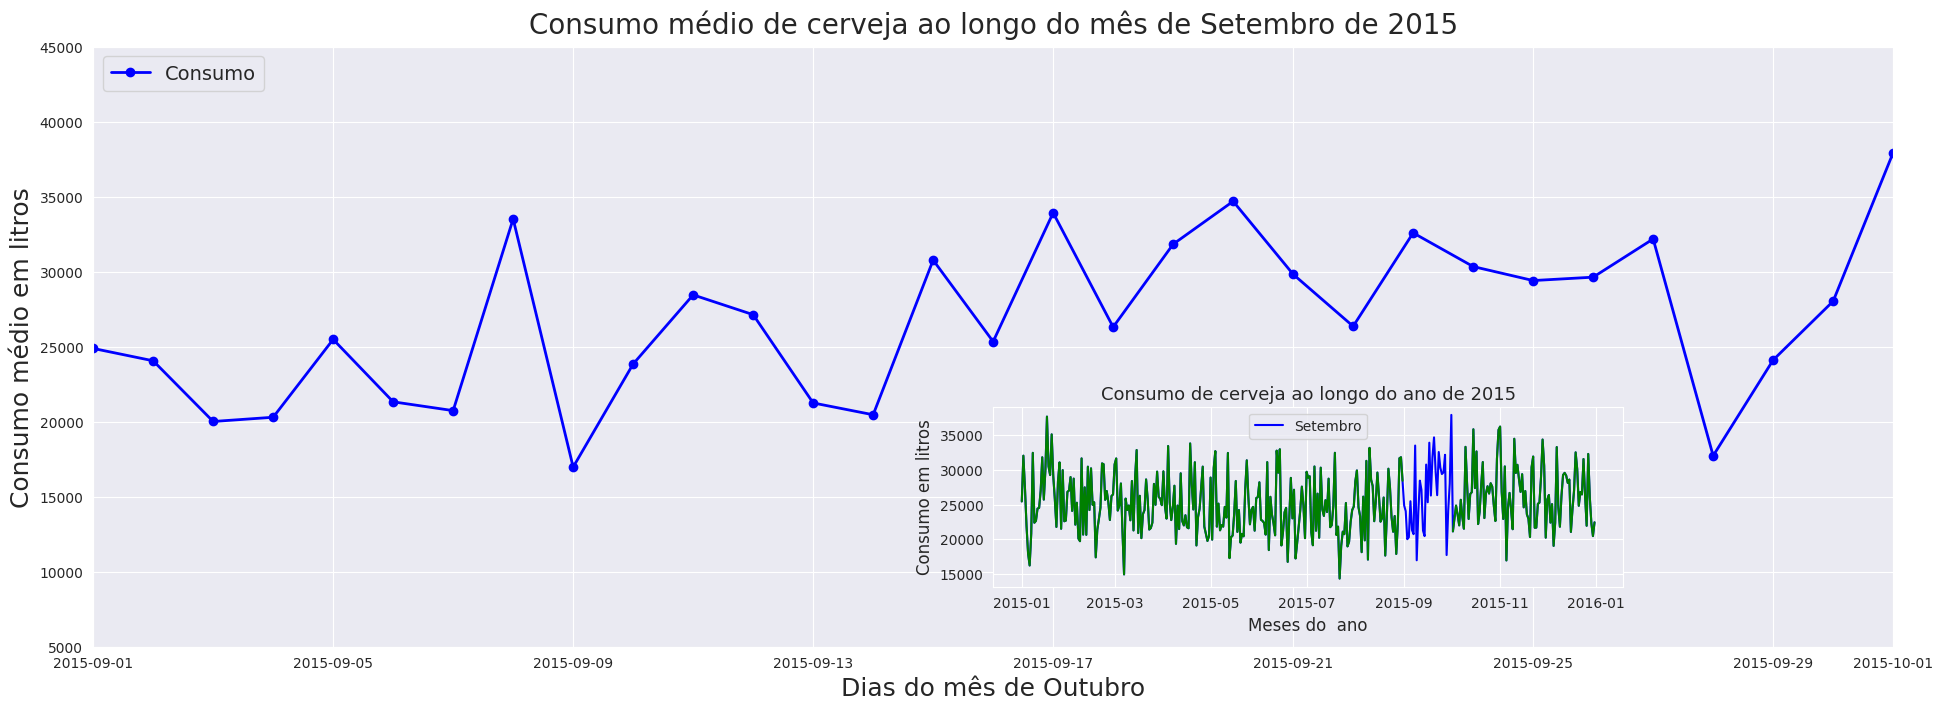

In [193]:
# Criar o gráfico
fig = plt.figure(figsize=(18, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([0.5, 0.1, 0.35, 0.3])
ax_2.grid(True)

ax.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='b', lw=2, marker='o')
ax.set_xlim(datetime(2015, 9, 1), datetime(2015, 10, 1))
ax.set_ylim(5000, 45000)
ax.set_title('Consumo médio de cerveja ao longo do mês de Setembro de 2015', fontsize=20, pad=10)
ax.set_xlabel('Dias do mês de Outubro', fontsize=18)
ax.set_ylabel('Consumo médio em litros', fontsize=18)
ax.legend(['Consumo'], loc='upper left', fontsize=14)
ax.grid(True)

# filtro azul a esquerda para a variável data que seja anterior a data de Março de 2015
azul_esquerda = consumo_por_dia['dia'] < datetime(2015, 9, 1).date() # Mudando variável para o tipo datetime.date
# filtro azul a direita para a variável data que seja posterior a data de Maio de 2014
azul_direita = consumo_por_dia['dia'] > datetime(2015, 10, 1).date() # Mudando variável para o tipo datetime.date

ax_2.plot(consumo_por_dia['dia'], consumo_por_dia['consumo'], color='b')
# Mudando o eixo 2 para as nossas variáveis
ax_2.plot(consumo_por_dia[azul_esquerda]['dia'], consumo_por_dia[azul_esquerda]['consumo'], color='g')
ax_2.plot(consumo_por_dia[azul_direita]['dia'], consumo_por_dia[azul_direita]['consumo'], color='g')
ax_2.set_title('Consumo de cerveja ao longo do ano de 2015', fontsize=13, pad=5)
ax_2.set_ylabel('Consumo em litros', fontsize=12)
ax_2.set_xlabel('Meses do  ano', fontsize=12)
ax_2.legend(['Setembro'], loc='upper center')

## Conclusão das análises feitas para os meses de Julho e Setembro
### Sabendo que o período mais frio do ano se concentra nos meses de Junho e Julho, não é surpresa encontrar números que revelam uma grande diminuição no consumo de cerveja, como também não é surpresa uma alta no consumo a medida que a temperatura aumenta, visto que a temperatura também volta a aumentar nesse período, então num primeiro momento podemos entender que há uma correlação boa entre consimo e temperatura.

# <font color='white' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [194]:
import seaborn as sns

<Axes: title={'center': 'Consumo de Cerveja'}, ylabel='Litros'>

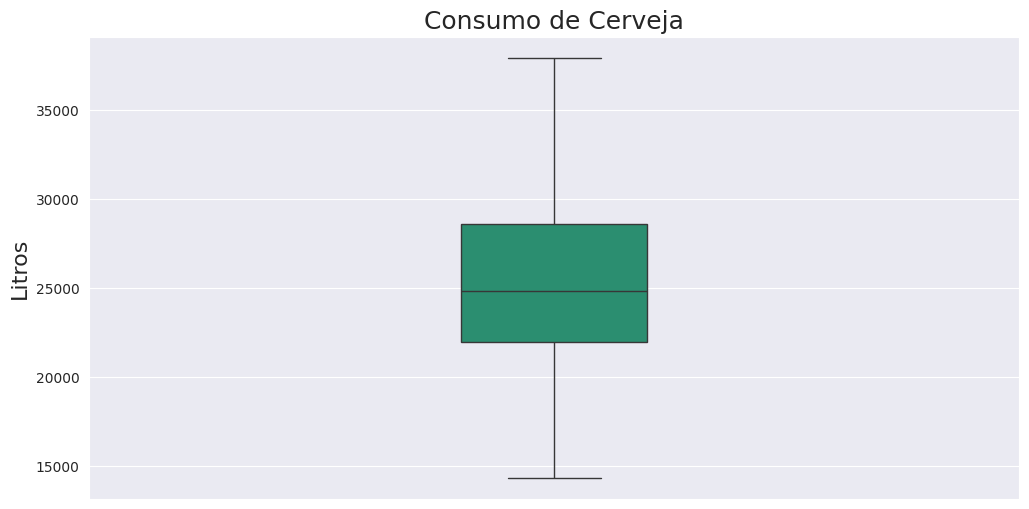

In [195]:
ax = sns.boxplot(data = dados['consumo'], orient = 'v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=18)
ax.set_ylabel('Litros', fontsize=16)
ax

### Pontos importantes oservados no gráfico acima:
* Não foram encontrados dados discrepantes (outliers)
* A distribuição dos dados parece bem comportada, com a mediana apenas um pouco abaixo do que seria uma mediana perfeitamente simétrica.

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

# <font color='white' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

In [196]:
sns.set_palette("Dark2")
sns.set_style("darkgrid")

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

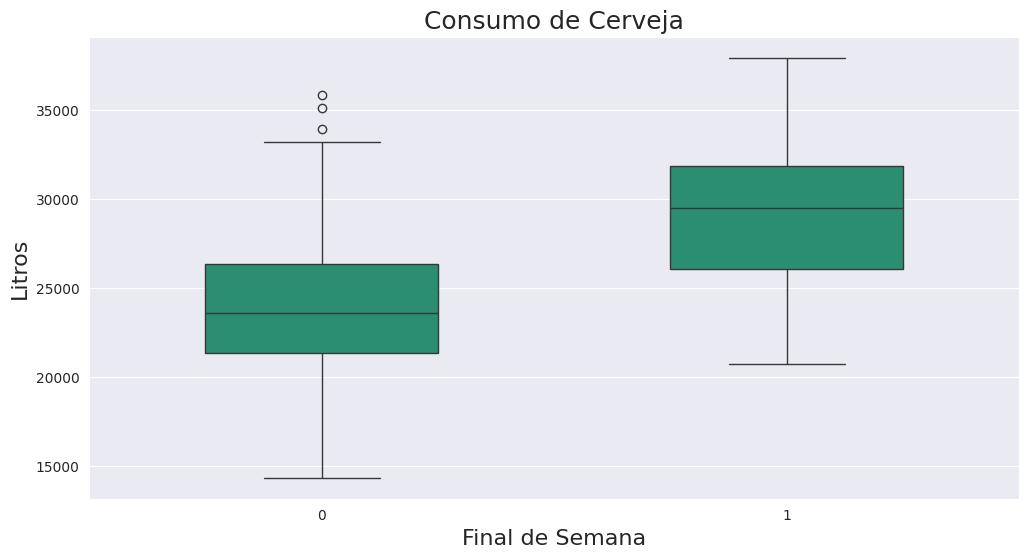

In [197]:
ax = sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient = 'v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=18)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

### Pontos importantes:

* Observa-se visivelmente que quando comparamos o consumo de cerveja nos chamados "dias úteis" (0) com os finais de semana (1), nota-se que as estatísiticas são diferentes, sendo o consumo de cerveja maior nos finais de semana.

* Também foi observada a presença de outliers nos chamados "dias úteis", talvez por algum feriado que possa ter elevado o consumo de cerveja nesse período.


# <font color='white' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='consumo', ylabel='consumo de Cerveja (Litros)'>

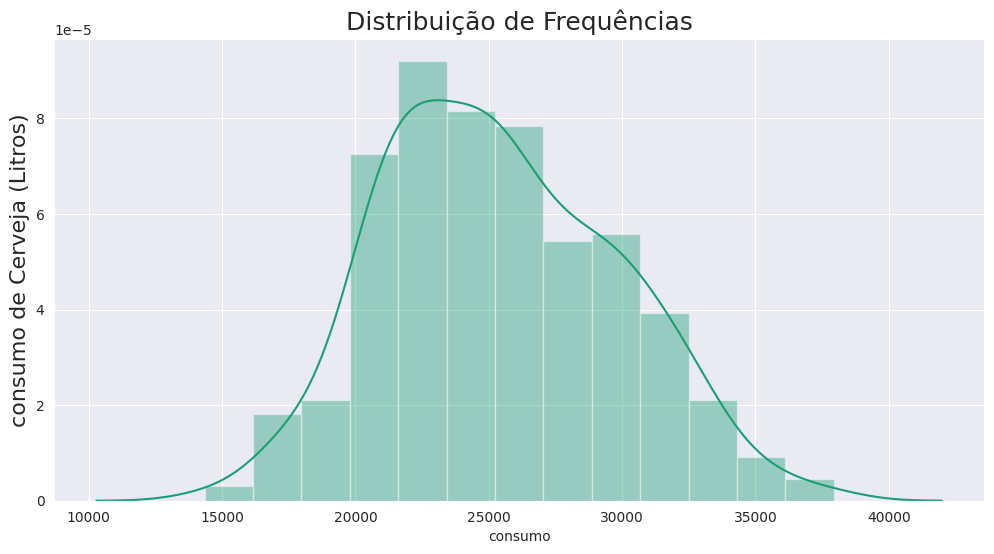

In [198]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=18)
ax.set_ylabel('consumo de Cerveja (Litros)', fontsize=16)
ax

# <font color='white' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas I</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset
###  Plotando o pairplot fixando somente uma variável no eixo y

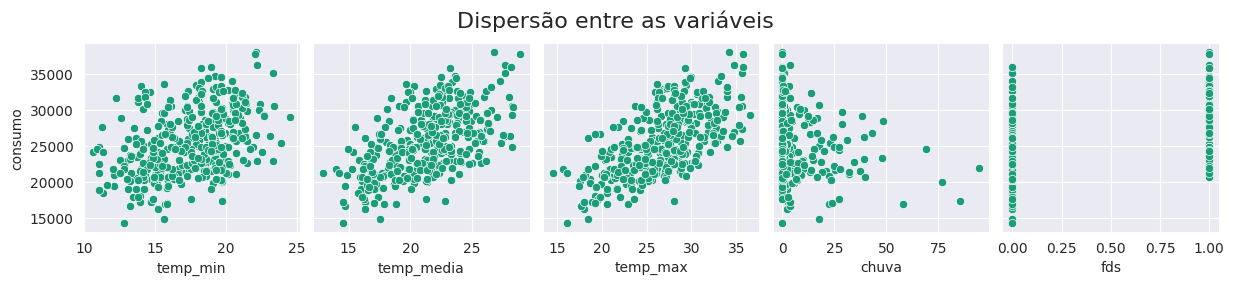

In [199]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=16, y=1.10)
ax

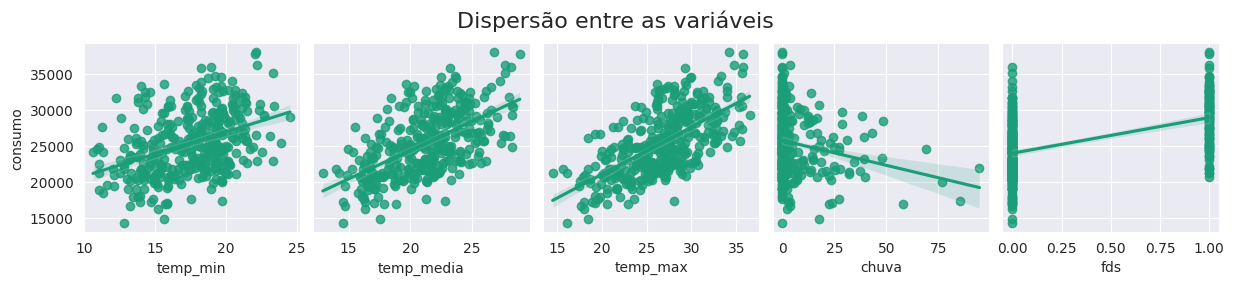

In [200]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=16, y=1.10)
ax

### Observações:
* Nota-se nos gráficos acima, uma provável relação mais forte entre consumo e a temperatura máxima em comparação com as demais variáveis explicativas. Vamos dar uma olhada mais de perto.

# <font color='white' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas II</font>
<hr style='border: 2px solid red;'>


## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

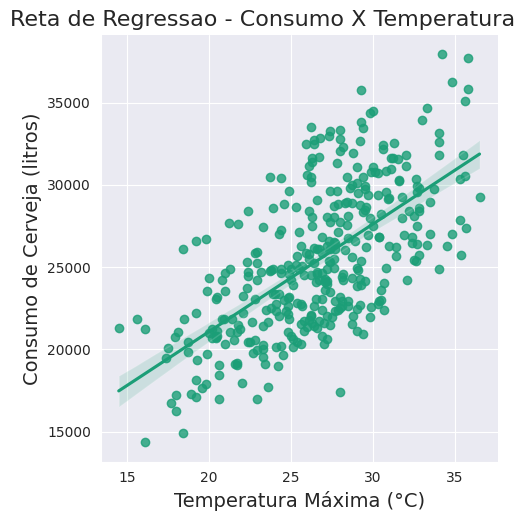

In [201]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Plotando um lmplot utilizando uma terceira variável na análise

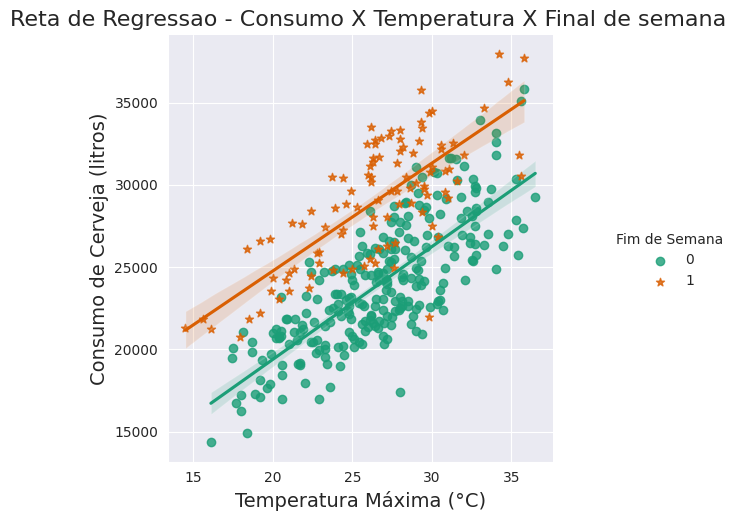

In [202]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=["o", "*"], legend=False)
ax.fig.suptitle("Reta de Regressao - Consumo X Temperatura X Final de semana", fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

### Observações:

* Agora colocando uma 3ª variável explicativa pode se notar que na verdade a relação mais forte é entre consumo e final de semana.

# <font color='white' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [204]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [205]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [206]:
X = dados[['temp_max', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

Aqui o professor usou o random_state=2811 mas isso não é um padrão.
test_size=0.3 significa que 30% dos dados do dataframe serão separados para teste, e 70% para treino.

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [208]:
X_train.shape

(255, 3)

In [209]:
X_test.shape

(110, 3)

# Função de Regressão com Três variáveis explicativas

## 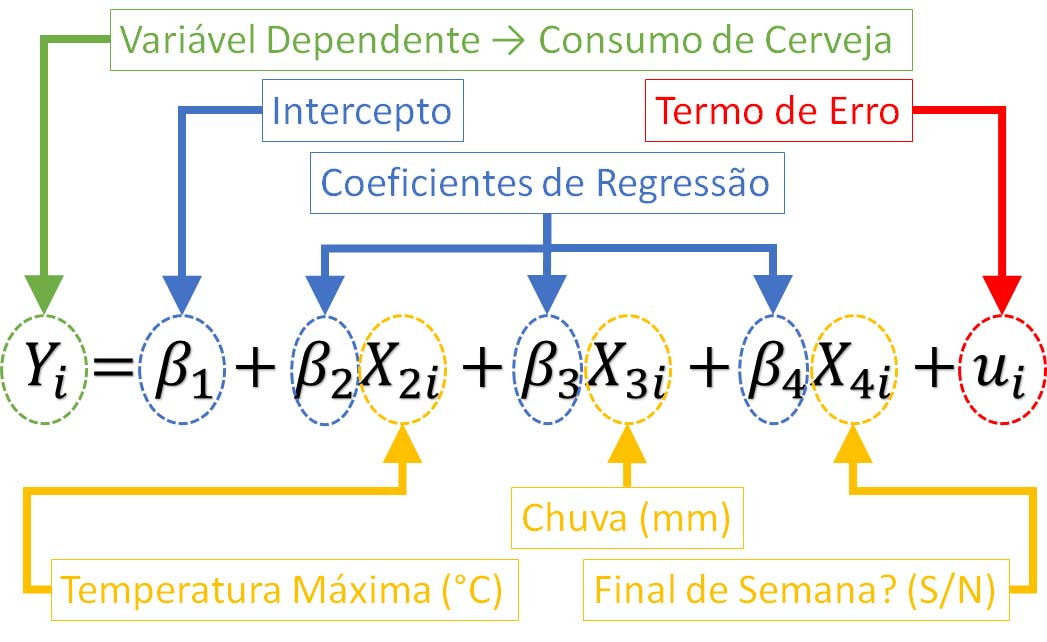$Yi = β1 + β2X2i + β3Xei + β4X4i + Ui$

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [214]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [215]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [216]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.73


#### Levando em consideração a pouca quantidade de variáveis e de dados, um R² de 0.73 pode ser considerado no mínimo razoavel. Vamos testa-lo agora.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [217]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [218]:
print(f'R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


#### Agora obtendo o R² para o nosso modelo de previsão, foi obtido um valor menor, porém ele ainda continua razoável pelos mesmos motivos mencionados mais acima.

# <font color='white' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [219]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [220]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [256]:
temp_max=34.5
chuva=0
fds=1
entrada = [[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0] :.2f} litros.')

34976.48 litros.


# <font color='white' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [223]:
modelo.intercept_

5951.976339312445

In [224]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [225]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [226]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [227]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [228]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [229]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='white' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [230]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

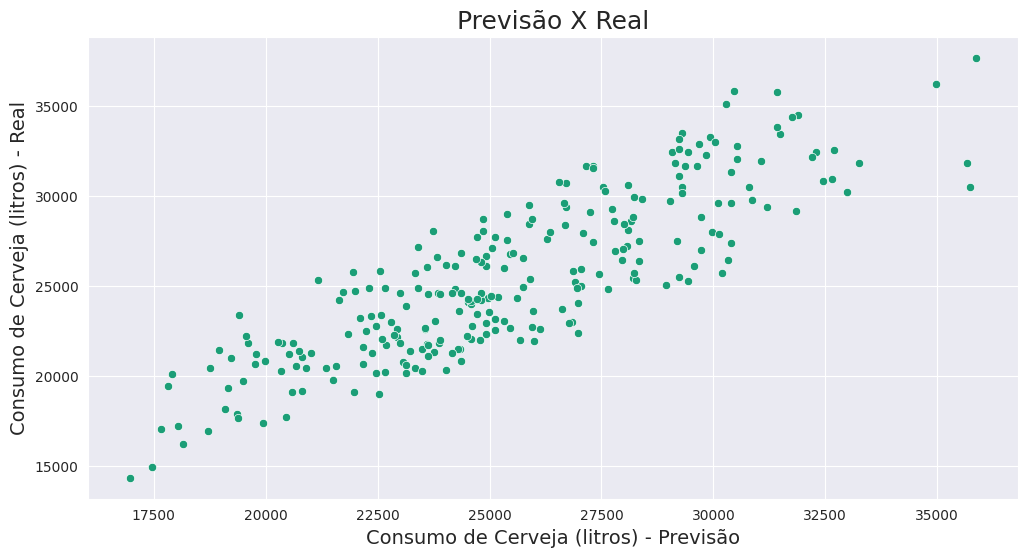

In [231]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

## Obtendo os resíduos

In [232]:
residuo = y_train - y_previsto_train

In [233]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

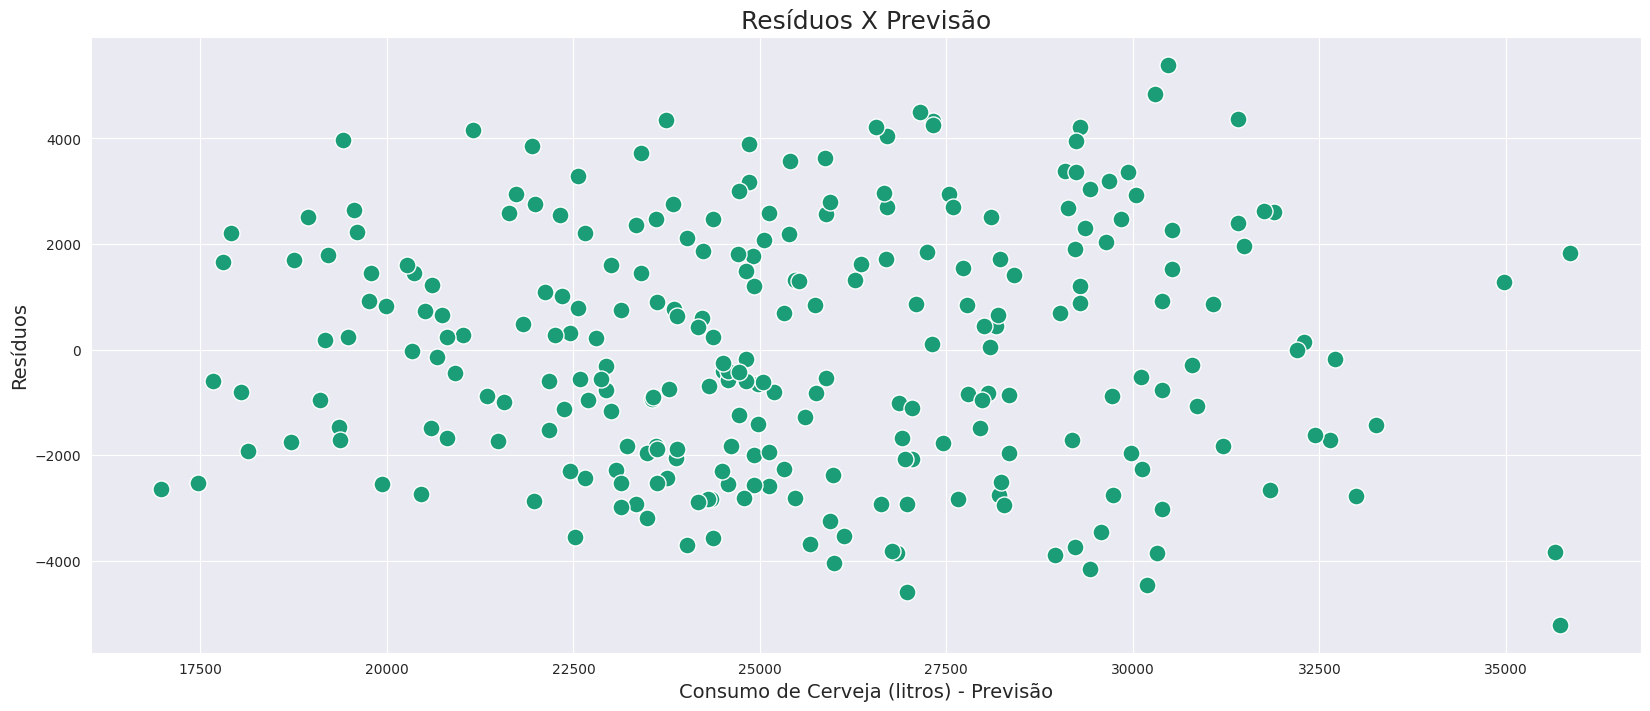

In [234]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='../Dados/img/var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

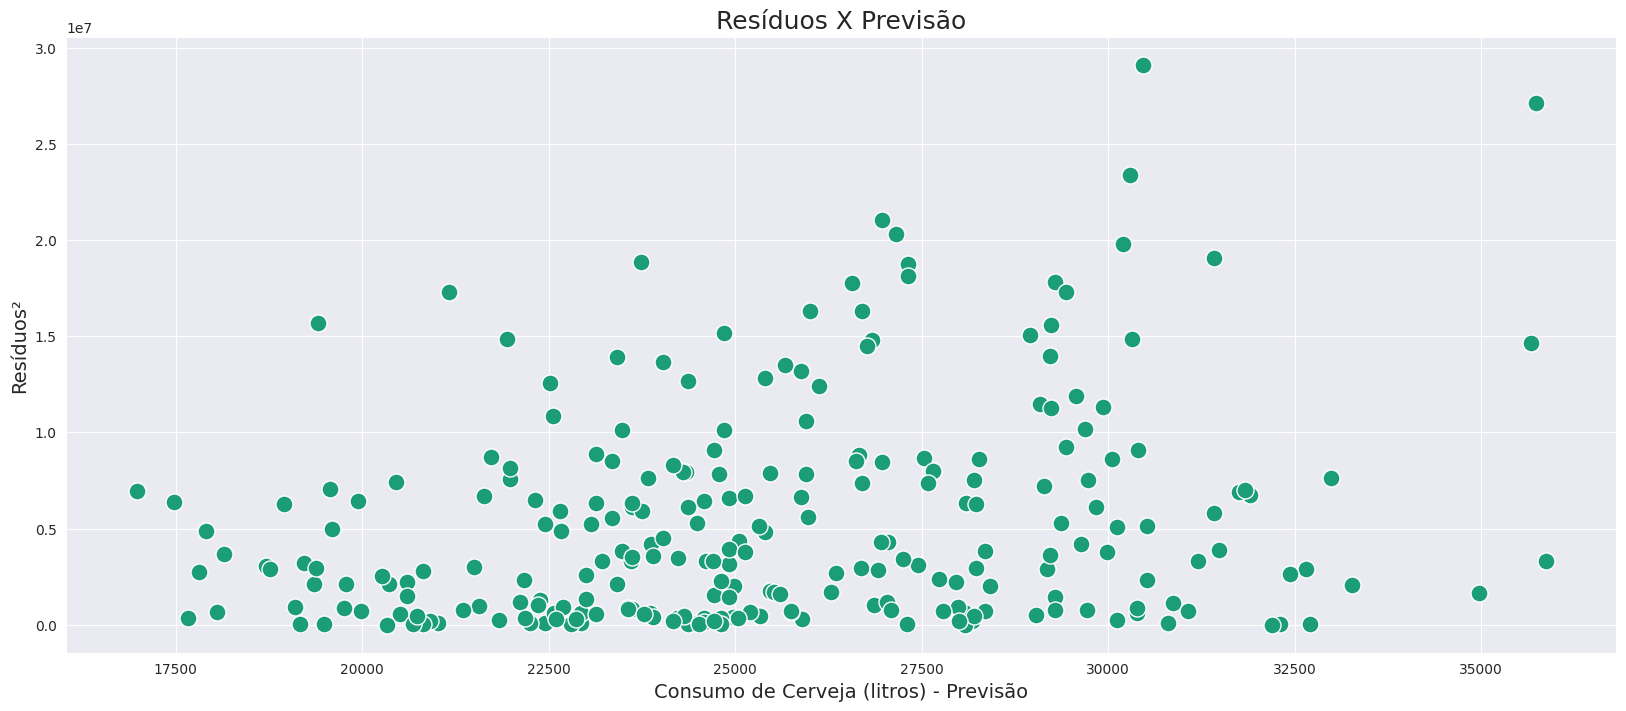

In [235]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

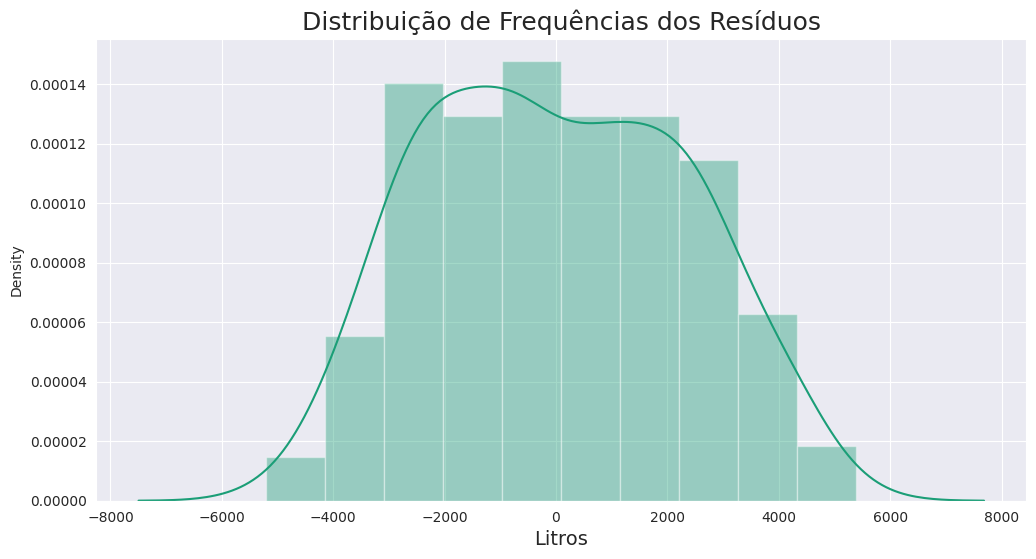

In [236]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='white' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [237]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [238]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [239]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [240]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [241]:
print('Modelo com temp. Média')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com temp. Média
R² = 0.66


In [242]:
print('Modelo com temp. Máxima')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [243]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [244]:
print('Modelo com temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com temp. Média
R² = 0.66


In [245]:
print('Modelo com temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com temp. Máxima
R² = 0.69


# <font color='white' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [246]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['Erro Quadrático Médio', 'Raíz do Erro Quadrático Médio', 'R²'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,6060775.46
Raíz do Erro Quadrático Médio,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [247]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['Erro Quadrático Médio', 'Raíz do Erro Quadrático Médio', 'R²'], columns=['Métricas'])

,Métricas
Erro Quadrático Médio,5471976.38
Raíz do Erro Quadrático Médio,2339.23
R²,0.69


# <font color='white' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [248]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [249]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [250]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [251]:
temp_max=30.5
chuva=12.2
fds=0
entrada = [[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0] :.2f} litros.')

26094.90 litros.


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [252]:
import pickle

In [253]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```